In [1]:
#packages
from os import listdir, remove
from os.path import join
import numpy as np
import zipfile
from glob import glob
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

In [3]:
# choose directory: where the zip files are saved?
load_path = "C:\\Users\\punit\\Desktop\\test\\raster santenal\\unzip sentinel"

In [4]:
# start Process
allfiles = []
for fil in listdir(load_path):
    if fil.endswith(".zip"):
        allfiles.append(fil)
del (fil)
allfiles


['S2A_MSIL1C_20230520T114351_N0509_R123_T29ULS_20230520T151921.zip']

In [5]:
allNames = np.copy(allfiles)
for i in range(0,len(allfiles)):
    allNames[i] = allfiles[i][:-4]

In [6]:
for i in range(0,len(allfiles)):
    zipf = join(load_path, allfiles[i])
    
    zip_ref = zipfile.ZipFile(zipf, 'r')
    zip_ref.extractall(load_path)
    zip_ref.close()
    print('ZIP file:'+str(allNames[i])+' extracted'+str(i+1)+'/'+str(len(allNames)))
    #remove(zipf)
    #print('ZIP file:'+allNames[i]+' removed')

print ('Job done!')

ZIP file:S2A_MSIL1C_20230520T114351_N0509_R123_T29ULS_20230520T151921 extracted1/1
Job done!


In [7]:
%cd "C:\Users\punit\Desktop\test\raster santenal\unzip sentinel"

C:\Users\punit\Desktop\test\raster santenal\unzip sentinel


In [8]:
str2=allNames[i]+".SAFE\GRANULE\*\IMG_DATA\*B?*.jp2"
str2

'S2A_MSIL1C_20230520T114351_N0509_R123_T29ULS_20230520T151921.SAFE\\GRANULE\\*\\IMG_DATA\\*B?*.jp2'

In [12]:
S_sentinel_bands = glob(str2)

S_sentinel_bands.sort()
S_sentinel_bands

['S2A_MSIL1C_20230520T114351_N0509_R123_T29ULS_20230520T151921.SAFE\\GRANULE\\L1C_T29ULS_A041304_20230520T114349\\IMG_DATA\\T29ULS_20230520T114351_B01.jp2',
 'S2A_MSIL1C_20230520T114351_N0509_R123_T29ULS_20230520T151921.SAFE\\GRANULE\\L1C_T29ULS_A041304_20230520T114349\\IMG_DATA\\T29ULS_20230520T114351_B02.jp2',
 'S2A_MSIL1C_20230520T114351_N0509_R123_T29ULS_20230520T151921.SAFE\\GRANULE\\L1C_T29ULS_A041304_20230520T114349\\IMG_DATA\\T29ULS_20230520T114351_B03.jp2',
 'S2A_MSIL1C_20230520T114351_N0509_R123_T29ULS_20230520T151921.SAFE\\GRANULE\\L1C_T29ULS_A041304_20230520T114349\\IMG_DATA\\T29ULS_20230520T114351_B04.jp2',
 'S2A_MSIL1C_20230520T114351_N0509_R123_T29ULS_20230520T151921.SAFE\\GRANULE\\L1C_T29ULS_A041304_20230520T114349\\IMG_DATA\\T29ULS_20230520T114351_B05.jp2',
 'S2A_MSIL1C_20230520T114351_N0509_R123_T29ULS_20230520T151921.SAFE\\GRANULE\\L1C_T29ULS_A041304_20230520T114349\\IMG_DATA\\T29ULS_20230520T114351_B06.jp2',
 'S2A_MSIL1C_20230520T114351_N0509_R123_T29ULS_20230520T15

In [10]:
from rasterio.windows import Window

l1 = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    print(f.shape)
    l1.append(f.read(1))

(1830, 1830)
(10980, 10980)
(10980, 10980)
(10980, 10980)
(5490, 5490)
(5490, 5490)
(5490, 5490)
(10980, 10980)
(1830, 1830)
(1830, 1830)
(5490, 5490)
(5490, 5490)
(5490, 5490)


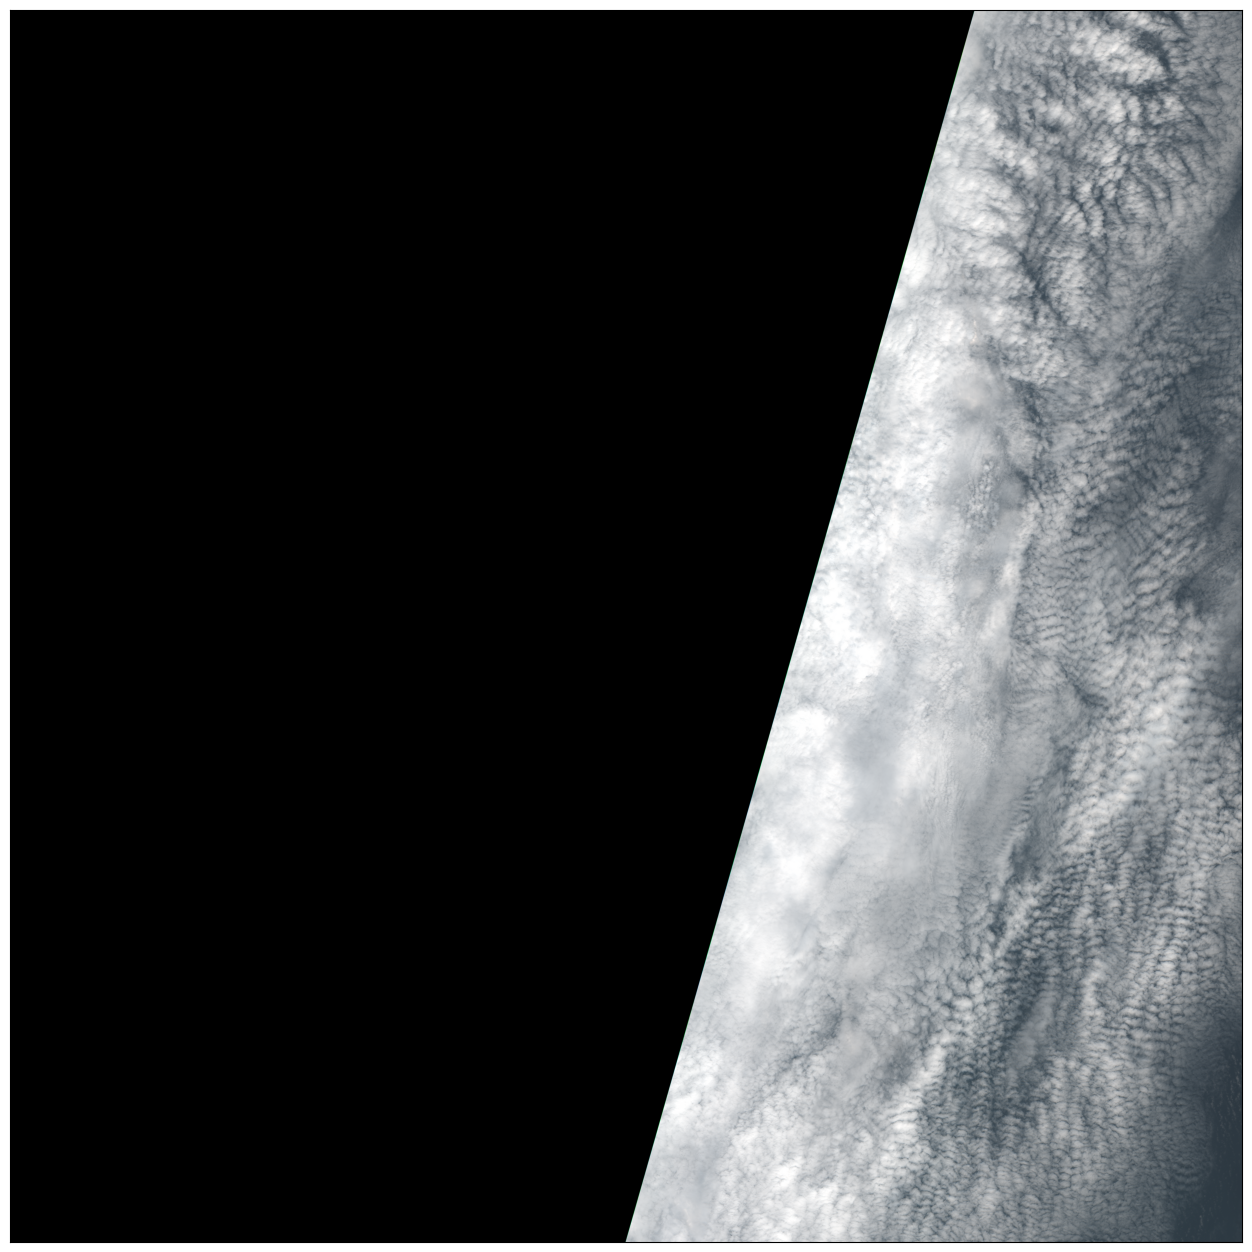

In [11]:
arr_st11=np.stack([l1[1],l1[1],l1[2],l1[3]])

ep.plot_rgb(
    arr_st11,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=00.2,
    figsize=(20, 16),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

In [ ]:
from rasterio.windows import Window
str1=allNames[i]+".SAFE\GRANULE\*\IMG_DATA\*TC?*.jp2"
S_sentinel_bands_tci = glob(str1)
c.sort()
print (S_sentinel_bands_tci)



['S2A_MSIL1C_20230520T114351_N0509_R123_T29ULS_20230520T151921.SAFE\\GRANULE\\L1C_T29ULS_A041304_20230520T114349\\IMG_DATA\\T29ULS_20230520T114351_TCI.jp2']


In [ ]:
from rasterio.windows import Window

l4 = []
for i in S_sentinel_bands_tci:
  with rio.open(i, 'r') as f:
    print(f.shape)
    l4.append(f.read(1))

arr_st11=np.stack([l4[0]])

ep.plot_bands(arr_st11, cmap = 'gist_earth', figsize = (10, 10), cols = 6, cbar = False)
plt.show()

(10980, 10980)
